# Utilidades para as prácticas

In [1]:
import uproot
import numpy as np
import pandas as pd

## Ler os datos

Debes seguir os seguintes pasos:

1. Ler os 3 ficheiros con `uproot` en modo `pd`
2. Convertir as columas de vectores a `np.array()`
3. Concatenar os 3 dataframes e listo

In [3]:
df1 = uproot.open("/media/Data/E796v2/Simulation/ML/Outputs/tree_11Li_2H_1H_Ex_0.00.root:SimulationTree").arrays(library="pd") 
df2 = uproot.open("/media/Data/E796v2/Simulation/ML/Outputs/tree_11Li_2H_2H_Ex_0.00.root:SimulationTree").arrays(library="pd") 
df3 = uproot.open("/media/Data/E796v2/Simulation/ML/Outputs/tree_11Li_2H_3H_Ex_0.00.root:SimulationTree").arrays(library="pd") 

parts = ["p", "d", "t"]
dfs = [df1, df2, df3]
for i,df in enumerate(dfs):
    df = df.drop(columns=["profx"]) # Eliminamos esta columna que non nos interesa e ocupa bastante memoria
    df["profy"] = df["profy"].apply(lambda x : np.array(x))
    df["label"] = parts[i]
    dfs[i] = df
## And concat all transformed individual dfs
df = pd.concat(dfs)
# Gate on events of interest
df = df[df["dE1"] > 0]
df.head()

,dEgas,dE0,dE1,T3,theta3,RPx,T3After1,profy,label
0,0.218267,11.479183,8.230044,20.108731,34.441817,254.680336,0.000000,"[0.0004191933840047568, 0.0, 0.0, 0.0, 0.0, 0....",p
1,0.305491,8.457327,15.478861,24.344296,22.309028,148.015405,0.000000,"[0.0007218921091407537, 0.000720073061529547, ...",p
2,-0.042595,7.362828,13.566279,24.217738,21.008768,219.022179,3.314466,"[0.0007668694597668946, 0.0007578445947729051,...",p
3,0.094662,7.521955,12.172503,25.118176,16.637236,187.528524,5.319978,"[0.0003882489399984479, 0.0003868640342261642,...",p
4,0.149947,6.148745,10.291179,25.523476,17.121025,199.394260,8.963668,"[0.00023248372599482536, 0.0002352454903302714...",p


A estrutura dos datos é a seguinte:
- *dEGas* é a perda de enerxía da partícula no gas sobre o pad plane
- *dE0* é a perda de enerxía no primeiro muro de silicios
- *dE1* é a perda de enerxía no segundo muro de silicios
- *T3* é a enerxía inicial da partícula (a que calculas ti coa cinemática teórica, p.ex) no Lab
- *theta3* é o ángulo da partícula no Lab
- *RPx* é o punto X (na dirección do beam) na que ocorre a reacción
- *T3After1* é a enerxía que lle queda ás partículas despois de atravesar a segunda capa de silicios. $>0$ son os eventos que nos interesa reconstruír
- *profy* é o perfil de carga da partícula no pad plane. É a enerxía que deposita por unidade de lonxitude

## Como debuxar histogramas

Tes que usar o módulo `hist`. Podes atopar a súa documentación [aquí](https://hist.readthedocs.io/en/latest/) se queres ver as opcións de plotting e demais.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x725632da3250>, cbar=<matplotlib.colorbar.Colorbar object at 0x7256324fae60>, text=[])

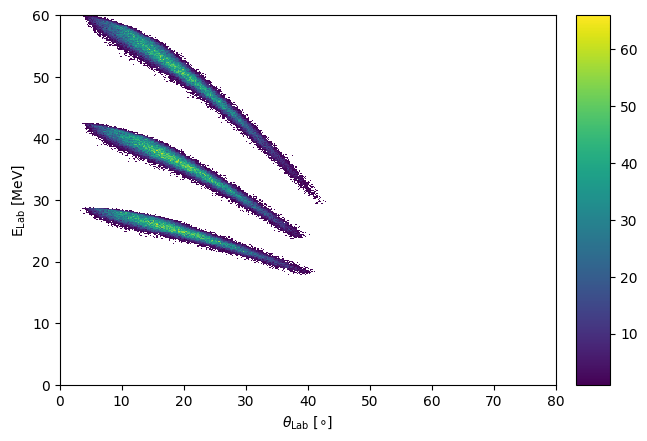

In [6]:
import hist

hkin = hist.Hist.new.Reg(400, 0, 80, label=r"$\theta_{\text{Lab}}$ [$\circ$]").Reg(400, 0, 60, label=r"E$_{\text{Lab}}$ [MeV]").Double()

# Enche os histogras evento a evento ou pasando o histograma con todas os valores directamente.
# Se é 1D, só un argumento
# Se é 2D, as dúas variables a histogramar
hkin.fill(df["theta3"], df["T3"])

## E para plotear con matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
hkin.plot(ax=ax, cmin=1) ## pon cmim = 1 se non vai debuxar os bins baleiros de cor e queda feo (proba)


## Unha clase en python

Unha clase é un obxecto de python que almacena información (*variables membro*) e permite interacionar con ela mediante funcións (*métodos*). A maioría das variables que usas no teu día a día son clases (`pd.DataFrame`, `plt.Axes`, ...)!


In [ ]:
class Kinematics:
    def __init__(self, m1: float, m2: float) -> None:
        """
        O método __init__ é obrigatorio sempre e permite inicializar as variables membro da clase. É o CONSTRUTOR
        Pásaslle como argumentos as variables que necesita de fóra e declaras as que vai conter máis adiante

        A palabra self fai referencia ao obxecto en si mesmo. É obrigatorio que sexa o primeiro argumento en todas as funcións
        e para acceder ás variables membro
        """
        self.m1 = m1
        self.m2 = m2
        # E así co resto de masas, T1, Ex...
        # Que vas calcular despois?
        self.Ecm = 0 # Aínda non a calculaches, poslle un valor por defecto
        self.beta = 0
        self.gamma = 0
        self.E3cm = 0
        # Etc
        return
    
    def compute_cm(self) -> None:
        """
        Aquí podes facer a primeira parte do cálculo: as partículas incidentes no LAB ao CM

        Computa Ecm, gamma, beta
        """
        # .... operacións

        # E actualizas a variable interna co valor calculado
        self.Ecm = 789 # por dicir algo. Non te olvides de chamar á función para que se calculen as cousas!
        self.E3cm = 4646
        return
    
    def get_kin_lab3(self) -> tuple:
        """
        Nesta función podes facer o cálculo das variables no LAB a partir dun valor thetaCM [0, 180] deg
        """

        # Podes devolver unha tupla con dous arrays:
        # x -> thetaLAB
        # y -> T3LAB
        return ()
    
# E como funciona?
kin = Kinematics(m1=4567, m2=5786)
kin.compute_cm()
thetaLab, TLab = kin.get_kin_lab3()

## Validación da cinemática

Usa `pyphysics.Kinematics` para validar os teus cálculos

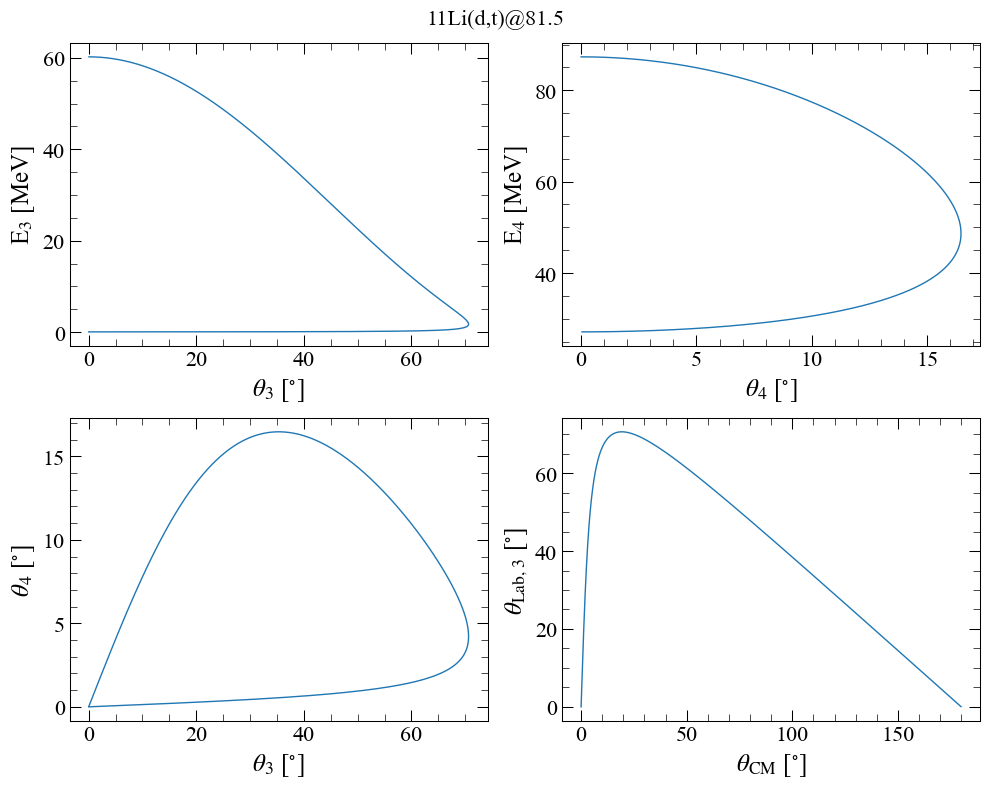

In [ ]:
import pyphysics as phys

k = phys.Kinematics("11Li(d,t)@81.5") ## O construtor aquí é "Particula1(Particula2, Particula3)@BeamEnergy|Ex", Ex = 0 se non especificas nada
k.draw()

# Ou para o que a ti che interesa...
thetaLab, TLab = k.get_line3()